<a href="https://colab.research.google.com/github/emiliooliveira/data_analyst_projects/blob/main/Analise_de_Dados_Campeonato_Brasileiro_do_Atletico_Mineiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_brasileirao = pd.read_csv('brasileirao2003.csv', sep=';')

Como torcedor do Atlético Mineiro e iniciante no mundo da análise de dados, decidi explorar o desempenho do clube nas edições do Campeonato Brasileiro de 2003 a 2024. Através dos dados disponíveis em um arquivo .csv, busquei identificar padrões de desempenho, melhores e piores campanhas, e outros insights interessantes.

# Inicio

Comecei carregando a base de dados do Brasileirão e visualizando as primeiras linhas para entender quais informações estavam disponíveis. A base inclui dados como temporada, time, pontos, vitórias, empates, derrotas, gols, entre outros.

In [3]:
print(df_brasileirao.head())

   temporada  posicao         time  pontos  total_de_jogos  vitorias  empates  \
0       2003        1     Cruzeiro     100              46        31        7   
1       2003        2       Santos      87              46        25       12   
2       2003        3    São Paulo      78              46        22       12   
3       2003        4  São Caetano      74              46        19       14   
4       2003        5     Coritiba      73              46        21       10   

   derrotas  gols  gols_sofridos  saldo_de_gols  
0         8   102             47             55  
1         9    93             60             33  
2        12    81             67             14  
3        13    53             37             16  
4        15    67             58              9  


Aqui, filtrei o DataFrame para trabalhar exclusivamente com os dados do Atlético Mineiro, meu time de coração. Isso nos permite focar apenas nas campanhas do Galo entre 2003 e 2024.

In [4]:
resultado = df_brasileirao[df_brasileirao['time'] == 'Atlético Mineiro']
print(resultado)

     temporada  posicao              time  pontos  total_de_jogos  vitorias  \
5         2003        6  Atlético Mineiro      72              46        19   
42        2004       19  Atlético Mineiro      53              46        12   
67        2005       20  Atlético Mineiro      47              42        13   
97        2007        8  Atlético Mineiro      55              38        15   
121       2008       12  Atlético Mineiro      48              38        12   
136       2009        7  Atlético Mineiro      56              38        16   
162       2010       13  Atlético Mineiro      45              38        13   
184       2011       15  Atlético Mineiro      45              38        13   
191       2012        2  Atlético Mineiro      72              38        20   
217       2013        8  Atlético Mineiro      57              38        15   
234       2014        5  Atlético Mineiro      62              38        17   
251       2015        2  Atlético Mineiro      69   

Foi feita uma ordenação das temporadas do clube por número de vitórias. Destaque para o ano de 2021, quando o Atlético foi campeão brasileiro com 26 vitórias e 67 gols marcados.

In [17]:
vitorias_temp = resultado.sort_values(by="vitorias", ascending=False)

max_vitorias_reset = vitorias_temp.reset_index(drop=True)

print(max_vitorias_reset[["temporada", "time", "posicao", "vitorias", "gols" ]])

    temporada              time  posicao  vitorias  gols
0        2021  Atlético Mineiro        1        26    67
1        2015  Atlético Mineiro        2        21    65
2        2020  Atlético Mineiro        3        20    64
3        2012  Atlético Mineiro        2        20    64
4        2003  Atlético Mineiro        6        19    76
5        2023  Atlético Mineiro        3        19    52
6        2018  Atlético Mineiro        6        17    56
7        2014  Atlético Mineiro        5        17    51
8        2016  Atlético Mineiro        4        17    61
9        2009  Atlético Mineiro        7        16    55
10       2022  Atlético Mineiro        7        15    45
11       2013  Atlético Mineiro        8        15    49
12       2007  Atlético Mineiro        8        15    63
13       2017  Atlético Mineiro        9        14    52
14       2010  Atlético Mineiro       13        13    52
15       2005  Atlético Mineiro       20        13    54
16       2011  Atlético Mineiro

Calculei a média de gols marcados pelo time por temporada. O resultado foi uma média de aproximadamente 56,1 gols, mostrando um bom poder ofensivo ao longo dos anos.

In [18]:
atletico = resultado[resultado["time"] == "Atlético Mineiro"]

media_gols_atletico = atletico["gols"].mean()

print(f"A média de gols do Atlético Mineiro foi: {media_gols_atletico}")

A média de gols do Atlético Mineiro foi: 56.095238095238095


Filtrei as temporadas em que o clube terminou entre os quatro primeiros colocados (famoso G4), garantindo vaga direta para a Copa Libertadores da América. Em destaque, a campanha de 2012, que garantiu a vaga para 2013. Ano em que o Galo foi campeão da Libertadores.

In [9]:
dentro_do_G4 = atletico[atletico["posicao"] <= 4]

dentro = dentro_do_G4.reset_index(drop=True)

print(dentro[["temporada", "posicao", "time"]])

   temporada  posicao              time
0       2012        2  Atlético Mineiro
1       2015        2  Atlético Mineiro
2       2016        4  Atlético Mineiro
3       2020        3  Atlético Mineiro
4       2021        1  Atlético Mineiro
5       2023        3  Atlético Mineiro


# Visualização de Dados

A visualização de dados é uma etapa essencial no processo de análise, pois permite comunicar informações de forma clara e direta por meio de representações visuais. Quando bem aplicada, ela se torna uma poderosa ferramenta de apoio à tomada de decisões. No entanto, é fundamental utilizá-la com cuidado, já que visualizações mal elaboradas podem causar mais confusão do que esclarecimento.

Com base na parte acima, sabemos que as temporadas em que o atletico ficou dentro do G4 foram 2012, 2015, 2016, 2020, 2021 e 2023. Sendo assim, irei apresentar estes dados de forma gráfica, mostrando a importancia de poder visualizar estes dados

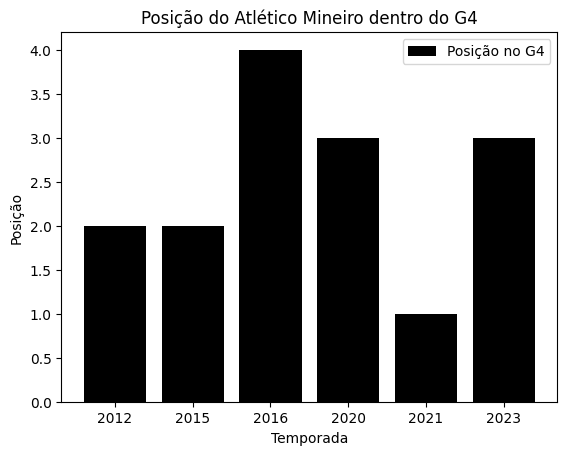

In [16]:
posicao = dentro["temporada"].astype(str)
ctg_posicao = dentro["posicao"]

cor_galo = '#000000'
cores = [cor_galo] * len(posicao)

legenda = f'Posição no G4'

plt.bar(posicao, ctg_posicao, color=cores)
plt.xlabel('Temporada')
plt.ylabel('Posição')
plt.title('Posição do Atlético Mineiro dentro do G4')
plt.legend([legenda])
plt.show()

Nem toda história é feita só de glórias e todo torcedor de verdade sabe disso. Analisando os dados, nos deparamos com um capítulo difícil da nossa trajetória: a temporada de 2005.

Foi o ano mais doloroso para o torcedor atleticano. Cada rodada parecia mais pesada que a anterior. A cada apito final, o sentimento de angústia aumentava. E no fim, veio o inevitável: o rebaixamento para a Série B. Um momento marcante, que ainda hoje ecoa nos corações de quem viveu aquele pesadelo de perto. Foram 21 derrotas.

In [ ]:
max_derrotas = atletico['derrotas'].max()

temporadas_mais_derrotas = atletico[atletico['derrotas'] == max_derrotas][['temporada', 'derrotas']]

print("Temporadas com mais derrotas:")
for _, row in temporadas_mais_derrotas.iterrows():
    print(f"Ano: {row['temporada']} - Derrotas: {row['derrotas']}")

Temporadas com mais derrotas:
Ano: 2005 - Derrotas: 21


# Conclusão
Através dessa análise, foi possível organizar e entender os dados do Atlético Mineiro no Campeonato Brasileiro entre 2003 e 2024.

Com a filtragem e os cálculos, confirmei que 2021 foi a temporada com mais vitórias e 2005 foi a temporada com mais derrotas, levando ao rebaixamento do clube. Também identifiquei a temporada com mais empates, que foi 2004.

Além disso, calculei a média de gols por temporada, que ficou em aproximadamente 56 gols. Verifiquei ainda os anos em que o clube terminou o campeonato entre os quatro primeiros colocados, garantindo vaga para a Libertadores.

Mesmo sendo iniciante, consegui aplicar comandos básicos de análise de dados em Python com o uso do Pandas, o que me ajudou a interpretar as informações da tabela de forma clara e direta.